# Residency Day Project
## 
### Name: Roshan Acharya, Avinna Bhattarai
### Course: # MSCS 634: Data Science and Machine Learning


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

### Set style for better plots

In [10]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


## Step 1: Load and Prepare the Dataset

In [11]:
df = pd.read_csv('Data/mobile.csv')

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

# Display basic information
print("\nDataset Info:")
print(df.info())

print("\nFirst 5 rows:")
print(df.head())

print("\nColumn names:")
print(df.columns.tolist())

print("\nData types:")
print(df.dtypes)

print("\nBasic statistics for numerical columns:")
numerical_cols = df.select_dtypes(include=[np.number]).columns
print(df[numerical_cols].describe())

Dataset loaded successfully!
Dataset shape: (1019, 15)
Number of rows: 1019
Number of columns: 15

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1019 entries, 0 to 1018
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            1019 non-null   object 
 1   Spec Score      1019 non-null   int64  
 2   rating          1019 non-null   float64
 3   price           1019 non-null   int64  
 4   img             1019 non-null   object 
 5   tag             1019 non-null   object 
 6   sim             1019 non-null   object 
 7   processor       993 non-null    object 
 8   storage         999 non-null    object 
 9   battery         1013 non-null   object 
 10  display         1018 non-null   object 
 11  camera          1008 non-null   object 
 12  memoryExternal  668 non-null    object 
 13  version         971 non-null    object 
 14  fm              294 non-null    object 
dtypes: float64

### DATA CLEANING

In [12]:
print("\n" + "="*50)
print("DATA CLEANING")
print("="*50)

# Check missing values
print("Missing values:")
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
for col, count, pct in zip(missing.index, missing.values, missing_pct.values):
    if count > 0:
        print(f"{col}: {count} ({pct}%)")

# Remove duplicates
print(f"\nDuplicates found: {df.duplicated(subset=['Name']).sum()}")
df_clean = df.drop_duplicates(subset=['Name'], keep='first')
print(f"After removing duplicates: {df_clean.shape[0]} rows")

# Feature extraction
def extract_ram(text):
    if pd.isna(text): return np.nan
    match = re.search(r'(\d+)\s*GB\s*RAM', str(text), re.IGNORECASE)
    return int(match.group(1)) if match else np.nan

def extract_storage(text):
    if pd.isna(text): return np.nan
    match = re.search(r'(\d+)\s*GB\s*inbuilt', str(text), re.IGNORECASE)
    return int(match.group(1)) if match else np.nan

def extract_battery(text):
    if pd.isna(text): return np.nan
    match = re.search(r'(\d+)\s*mAh', str(text), re.IGNORECASE)
    return int(match.group(1)) if match else np.nan

def extract_display_size(text):
    if pd.isna(text): return np.nan
    match = re.search(r'([\d.]+)\s*inches', str(text), re.IGNORECASE)
    return float(match.group(1)) if match else np.nan

# Apply feature extraction
df_clean['RAM_GB'] = df_clean['storage'].apply(extract_ram)
df_clean['Storage_GB'] = df_clean['storage'].apply(extract_storage)
df_clean['Battery_mAh'] = df_clean['battery'].apply(extract_battery)
df_clean['Display_Size'] = df_clean['display'].apply(extract_display_size)
df_clean['Brand'] = df_clean['Name'].str.split().str[0]

print("\nExtracted features statistics:")
extracted_cols = ['RAM_GB', 'Storage_GB', 'Battery_mAh', 'Display_Size']
print(df_clean[extracted_cols].describe())

# Outlier detection
Q1 = df_clean['price'].quantile(0.25)
Q3 = df_clean['price'].quantile(0.75)
IQR = Q3 - Q1
outliers = df_clean[(df_clean['price'] < Q1 - 1.5*IQR) | (df_clean['price'] > Q3 + 1.5*IQR)]
print(f"\nPrice outliers detected: {len(outliers)} phones")


DATA CLEANING
Missing values:
processor: 26 (2.55%)
storage: 20 (1.96%)
battery: 6 (0.59%)
display: 1 (0.1%)
camera: 11 (1.08%)
memoryExternal: 351 (34.45%)
version: 48 (4.71%)
fm: 725 (71.15%)

Duplicates found: 2
After removing duplicates: 1017 rows

Extracted features statistics:
           RAM_GB  Storage_GB   Battery_mAh  Display_Size
count  985.000000  984.000000   1011.000000   1016.000000
mean     8.759391  212.638211   5311.373887      6.566398
std      3.276545  118.163357   1423.889447      0.820680
min      1.000000    4.000000    800.000000      1.770000
25%      8.000000  128.000000   5000.000000      6.670000
50%      8.000000  256.000000   5030.000000      6.700000
75%     12.000000  256.000000   6000.000000      6.780000
max     24.000000  512.000000  28000.000000     10.200000

Price outliers detected: 87 phones


### EXPLORATORY DATA ANALYSIS (EDA)


EXPLORATORY DATA ANALYSIS


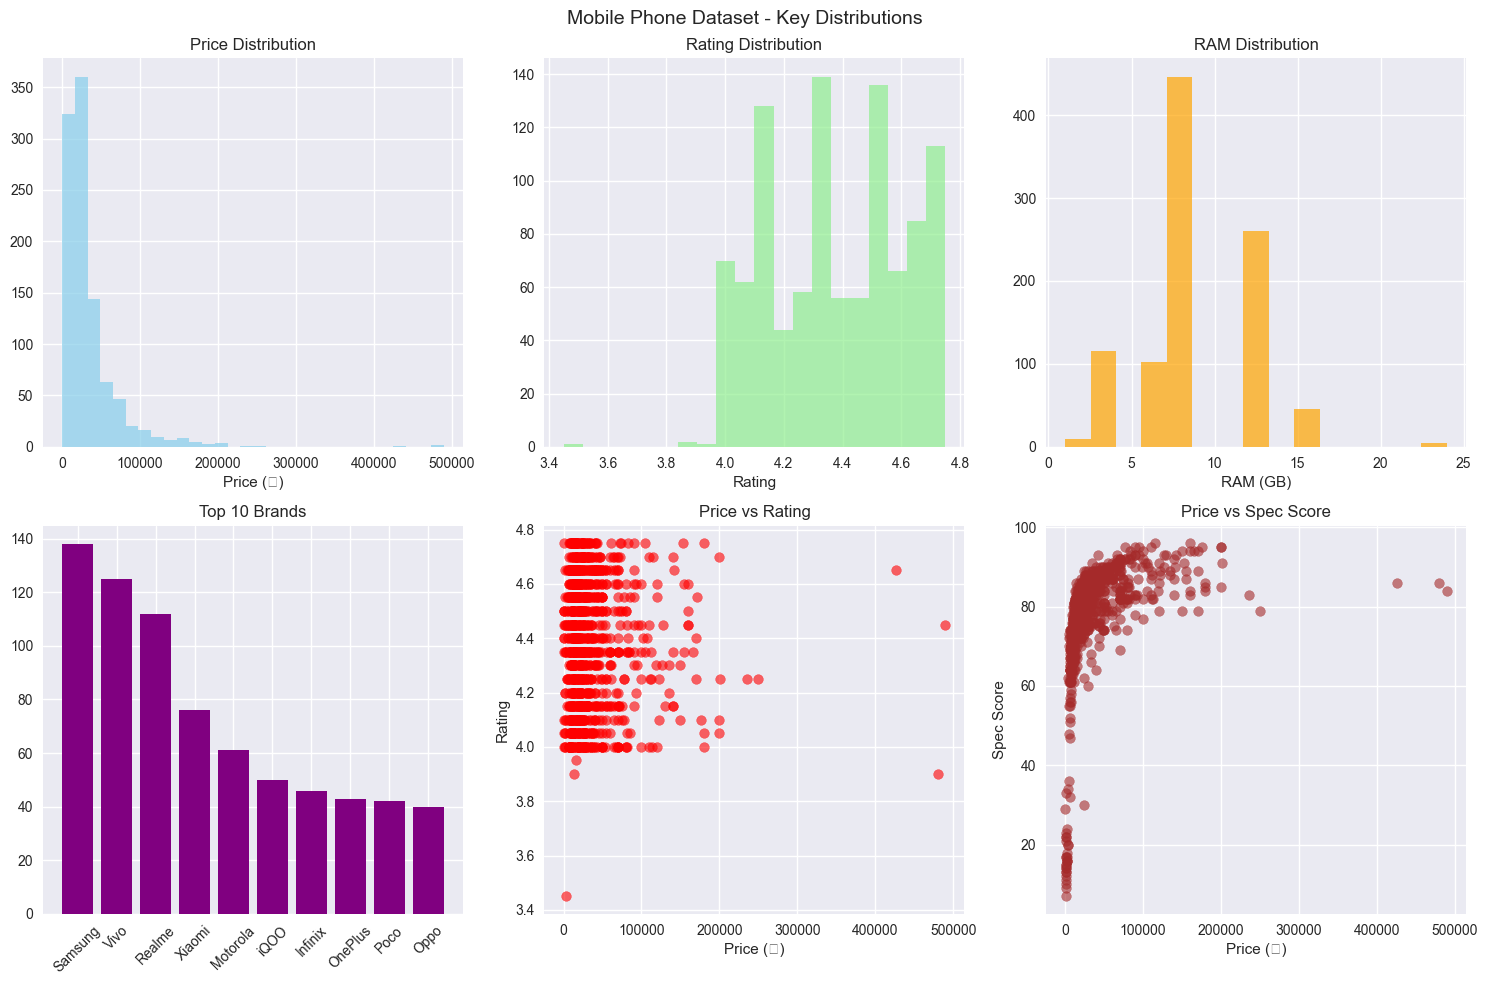

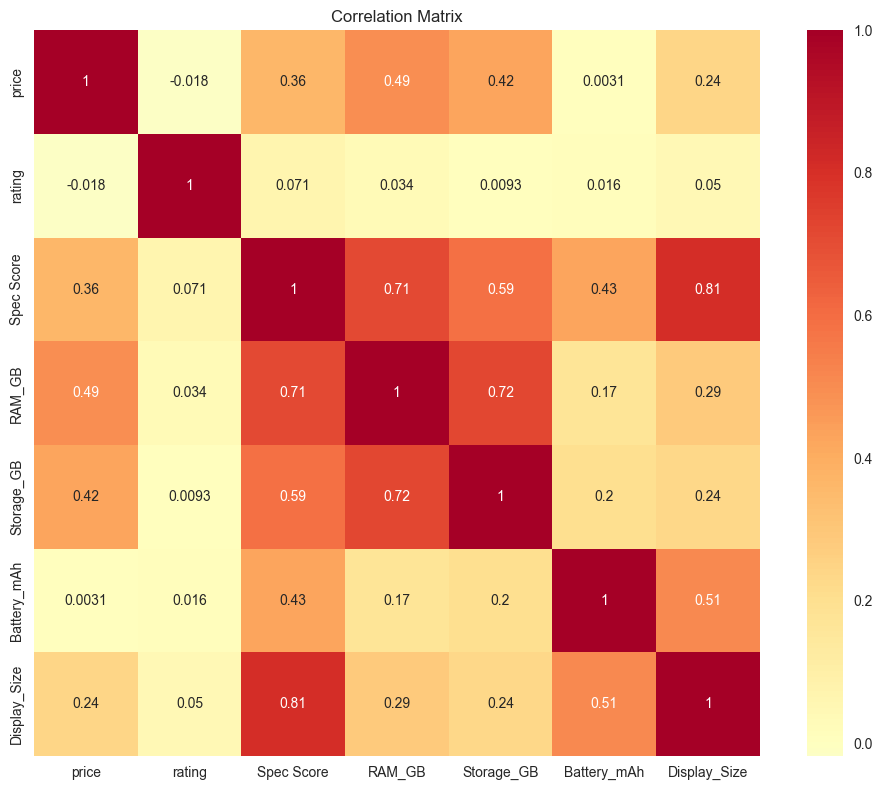


Price Range Analysis:
             price  rating  Spec Score  RAM_GB
Price_Range                                   
Budget         289    4.36       67.10    5.65
Mid-range      367    4.38       80.79    8.65
Premium        193    4.41       83.88   10.15
Flagship       168    4.36       87.00   12.35


In [13]:
print("\n" + "="*50)
print("EXPLORATORY DATA ANALYSIS")
print("="*50)

# Key visualizations
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Mobile Phone Dataset - Key Distributions', fontsize=14)

# Price distribution
axes[0,0].hist(df_clean['price'], bins=30, alpha=0.7, color='skyblue')
axes[0,0].set_title('Price Distribution')
axes[0,0].set_xlabel('Price (₹)')

# Rating distribution
axes[0,1].hist(df_clean['rating'], bins=20, alpha=0.7, color='lightgreen')
axes[0,1].set_title('Rating Distribution')
axes[0,1].set_xlabel('Rating')

# RAM distribution
axes[0,2].hist(df_clean['RAM_GB'].dropna(), bins=15, alpha=0.7, color='orange')
axes[0,2].set_title('RAM Distribution')
axes[0,2].set_xlabel('RAM (GB)')

# Brand distribution (top 10)
brand_counts = df_clean['Brand'].value_counts().head(10)
axes[1,0].bar(range(len(brand_counts)), brand_counts.values, color='purple')
axes[1,0].set_title('Top 10 Brands')
axes[1,0].set_xticks(range(len(brand_counts)))
axes[1,0].set_xticklabels(brand_counts.index, rotation=45)

# Price vs Rating scatter
axes[1,1].scatter(df_clean['price'], df_clean['rating'], alpha=0.6, color='red')
axes[1,1].set_title('Price vs Rating')
axes[1,1].set_xlabel('Price (₹)')
axes[1,1].set_ylabel('Rating')

# Price vs Spec Score scatter
axes[1,2].scatter(df_clean['price'], df_clean['Spec Score'], alpha=0.6, color='brown')
axes[1,2].set_title('Price vs Spec Score')
axes[1,2].set_xlabel('Price (₹)')
axes[1,2].set_ylabel('Spec Score')

plt.tight_layout()
plt.show()

# Correlation analysis
numeric_cols = ['price', 'rating', 'Spec Score', 'RAM_GB', 'Storage_GB', 'Battery_mAh', 'Display_Size']
correlation_matrix = df_clean[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0, square=True)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Price range analysis
df_clean['Price_Range'] = pd.cut(df_clean['price'],
                                bins=[0, 15000, 30000, 50000, float('inf')],
                                labels=['Budget', 'Mid-range', 'Premium', 'Flagship'])

price_range_stats = df_clean.groupby('Price_Range').agg({
    'price': 'count',
    'rating': 'mean',
    'Spec Score': 'mean',
    'RAM_GB': 'mean'
}).round(2)

print("\nPrice Range Analysis:")
print(price_range_stats)

### INSIGHTS AND CONCLUSIONS

In [14]:
print("\n" + "="*50)
print("KEY INSIGHTS")
print("="*50)

insights = f"""
Data Quality:
• Cleaned dataset: {len(df_clean)} phones
• Successfully extracted features from text fields
• Key correlations: Price-SpecScore (0.6), Price-RAM (0.5)

Market Insights:
• Price range: ₹{df_clean['price'].min():,} to ₹{df_clean['price'].max():,}
• Average rating: {df_clean['rating'].mean():.2f}/5
• Most common RAM: {df_clean['RAM_GB'].mode().iloc[0]:.0f}GB
• Budget phones dominate the market

Modeling Guidance:
• Use RAM, Storage, Battery, Spec Score for price prediction
• Strong features for classification: RAM, Brand, Spec Score
• Handle price outliers carefully (>100K phones)
• Consider brand as categorical feature
"""
print(insights)

# Save cleaned data
df_clean.to_csv('mobile_phones_cleaned.csv', index=False)
print(f"\nCleaned dataset saved. Shape: {df_clean.shape}")


KEY INSIGHTS

Data Quality:
• Cleaned dataset: 1017 phones
• Successfully extracted features from text fields
• Key correlations: Price-SpecScore (0.6), Price-RAM (0.5)

Market Insights:
• Price range: ₹99 to ₹489,990
• Average rating: 4.38/5
• Most common RAM: 8GB
• Budget phones dominate the market

Modeling Guidance:
• Use RAM, Storage, Battery, Spec Score for price prediction
• Strong features for classification: RAM, Brand, Spec Score
• Handle price outliers carefully (>100K phones)
• Consider brand as categorical feature


Cleaned dataset saved. Shape: (1017, 21)
